In [1]:
from unityagents import UnityEnvironment
import copy

In [2]:
from model import get_model
from helpers import train_model, save_model, plot_losses, plot_scores, test_model, load_model

In [3]:
# hyperparameters
lr = 0.00005
gamma = 0.9

batch_size = 30
buffer_size = 6000

c = 500
c_step = 0
e = 0.01
a = 0.6

input_depth = 37
hidden0 = 500
hidden1 = 300
hidden2 = 125
output_depth = 4

replay = []

In [4]:
model, loss_fn, optimizer = get_model(input_depth, hidden0, hidden1, hidden2, output_depth, lr)
model_ = copy.deepcopy(model)

In [5]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
# train model

epochs = 2500
epsilon = 1.0 # decays over the course of training
losses = []
scores = []

hyperparams = (epochs, epsilon, gamma)
actor_env = (model, model_, brain_name, env)
training = (loss_fn, optimizer)
exp_replay = (buffer_size, replay, batch_size)
double_per = (e, a, c, c_step)
metrics = (losses, scores)

train_model(hyperparams, actor_env, training, exp_replay, double_per, metrics)

cpu
epoch 0, loss: 0.00, score: -1.0
epoch 1, loss: 0.00, score: 1.0
epoch 2, loss: 0.00, score: 0.0
epoch 3, loss: 0.00, score: 1.0
epoch 4, loss: 0.00, score: 0.0
epoch 5, loss: 0.00, score: -1.0
epoch 6, loss: 0.00, score: -1.0
epoch 7, loss: 0.00, score: -1.0
epoch 8, loss: 0.00, score: 0.0
epoch 9, loss: 0.00, score: 1.0
epoch 10, loss: 0.00, score: 2.0
epoch 11, loss: 0.00, score: 1.0
epoch 12, loss: 0.00, score: 2.0
epoch 13, loss: 0.00, score: -1.0
epoch 14, loss: 0.00, score: -1.0
epoch 15, loss: 0.00, score: 0.0
epoch 16, loss: 0.00, score: 0.0
epoch 17, loss: 0.00, score: 1.0
epoch 18, loss: 0.00, score: -1.0
epoch 19, loss: 1.16, score: 0.0
epoch 20, loss: 205.33, score: 0.0
epoch 21, loss: 11131.26, score: 0.0
epoch 22, loss: 16956.53, score: 1.0
epoch 23, loss: 16023.15, score: -1.0
epoch 24, loss: 13966.77, score: 0.0
epoch 25, loss: 12112.24, score: -1.0
epoch 26, loss: 10607.94, score: 0.0
epoch 27, loss: 9408.04, score: 1.0
epoch 28, loss: 8449.80, score: -1.0
epoch 2

epoch 228, loss: 377.70, score: 0.0
epoch 229, loss: 375.90, score: 1.0
epoch 230, loss: 374.13, score: -1.0
epoch 231, loss: 372.37, score: -2.0
epoch 232, loss: 370.62, score: 2.0
epoch 233, loss: 368.90, score: 0.0
epoch 234, loss: 367.18, score: 1.0
epoch 235, loss: 365.49, score: 0.0
epoch 236, loss: 363.81, score: 0.0
epoch 237, loss: 362.14, score: 1.0
epoch 238, loss: 360.49, score: 0.0
epoch 239, loss: 358.86, score: -1.0
epoch 240, loss: 357.24, score: 0.0
epoch 241, loss: 355.63, score: 0.0
epoch 242, loss: 354.04, score: -1.0
epoch 243, loss: 352.46, score: 0.0
epoch 244, loss: 350.90, score: 0.0
epoch 245, loss: 349.35, score: 1.0
epoch 246, loss: 347.81, score: 1.0
epoch 247, loss: 346.29, score: -3.0
epoch 248, loss: 344.78, score: 1.0
epoch 249, loss: 343.28, score: 0.0
epoch 250, loss: 341.80, score: 0.0
epoch 251, loss: 340.33, score: 0.0
epoch 252, loss: 338.88, score: 2.0
epoch 253, loss: 337.43, score: -1.0
epoch 254, loss: 336.00, score: -1.0
epoch 255, loss: 334.

epoch 455, loss: 181.39, score: 1.0
epoch 456, loss: 180.98, score: -1.0
epoch 457, loss: 180.56, score: 2.0
epoch 458, loss: 180.15, score: 0.0
epoch 459, loss: 179.75, score: 1.0
epoch 460, loss: 179.34, score: 0.0
epoch 461, loss: 178.93, score: -2.0
epoch 462, loss: 178.53, score: 0.0
epoch 463, loss: 178.13, score: 3.0
epoch 464, loss: 177.73, score: -3.0
epoch 465, loss: 177.34, score: 2.0
epoch 466, loss: 176.94, score: 0.0
epoch 467, loss: 176.55, score: 1.0
epoch 468, loss: 176.16, score: 0.0
epoch 469, loss: 175.77, score: 1.0
epoch 470, loss: 175.38, score: 1.0
epoch 471, loss: 174.99, score: 3.0
epoch 472, loss: 174.61, score: 1.0
epoch 473, loss: 174.22, score: -1.0
epoch 474, loss: 173.84, score: 3.0
epoch 475, loss: 173.46, score: 0.0
epoch 476, loss: 173.08, score: 0.0
epoch 477, loss: 172.71, score: 0.0
epoch 478, loss: 172.33, score: 4.0
epoch 479, loss: 171.96, score: 1.0
epoch 480, loss: 171.59, score: 1.0
epoch 481, loss: 171.22, score: 0.0
epoch 482, loss: 170.85,

epoch 682, loss: 119.51, score: 1.0
epoch 683, loss: 119.33, score: -1.0
epoch 684, loss: 119.15, score: 3.0
epoch 685, loss: 118.97, score: 5.0
epoch 686, loss: 118.80, score: 1.0
epoch 687, loss: 118.62, score: 2.0
epoch 688, loss: 118.44, score: 0.0
epoch 689, loss: 118.27, score: 1.0
epoch 690, loss: 118.09, score: 2.0
epoch 691, loss: 117.92, score: 4.0
epoch 692, loss: 117.74, score: 3.0
epoch 693, loss: 117.57, score: 0.0
epoch 694, loss: 117.39, score: 2.0
epoch 695, loss: 117.22, score: 1.0
epoch 696, loss: 117.05, score: 5.0
epoch 697, loss: 116.88, score: 0.0
epoch 698, loss: 116.71, score: 4.0
epoch 699, loss: 116.54, score: 4.0
epoch 700, loss: 116.37, score: 0.0
epoch 701, loss: 116.20, score: 2.0
epoch 702, loss: 116.03, score: 4.0
epoch 703, loss: 115.86, score: 4.0
epoch 704, loss: 115.69, score: 3.0
epoch 705, loss: 115.52, score: 0.0
epoch 706, loss: 115.36, score: 2.0
epoch 707, loss: 115.19, score: -1.0
epoch 708, loss: 115.02, score: 3.0
epoch 709, loss: 114.86, s

epoch 912, loss: 88.88, score: 3.0
epoch 913, loss: 88.78, score: 0.0
epoch 914, loss: 88.68, score: 3.0
epoch 915, loss: 88.59, score: -1.0
epoch 916, loss: 88.49, score: 1.0
epoch 917, loss: 88.39, score: 1.0
epoch 918, loss: 88.29, score: 2.0
epoch 919, loss: 88.19, score: 2.0
epoch 920, loss: 88.10, score: 1.0
epoch 921, loss: 88.00, score: 3.0
epoch 922, loss: 87.90, score: -1.0
epoch 923, loss: 87.81, score: 0.0
epoch 924, loss: 87.71, score: 0.0
epoch 925, loss: 87.61, score: 5.0
epoch 926, loss: 87.52, score: 1.0
epoch 927, loss: 87.42, score: 1.0
epoch 928, loss: 87.33, score: -1.0
epoch 929, loss: 87.23, score: 6.0
epoch 930, loss: 87.14, score: 4.0
epoch 931, loss: 87.04, score: 4.0
epoch 932, loss: 86.95, score: 5.0
epoch 933, loss: 86.85, score: -2.0
epoch 934, loss: 86.76, score: 2.0
epoch 935, loss: 86.66, score: 2.0
epoch 936, loss: 86.57, score: 2.0
epoch 937, loss: 86.48, score: 4.0
epoch 938, loss: 86.38, score: 1.0
epoch 939, loss: 86.29, score: 2.0
epoch 940, loss:

epoch 1142, loss: 70.80, score: 3.0
epoch 1143, loss: 70.74, score: 1.0
epoch 1144, loss: 70.68, score: 0.0
epoch 1145, loss: 70.62, score: 3.0
epoch 1146, loss: 70.55, score: 3.0
epoch 1147, loss: 70.49, score: 3.0
epoch 1148, loss: 70.43, score: 6.0
epoch 1149, loss: 70.37, score: 9.0
epoch 1150, loss: 70.31, score: 5.0
epoch 1151, loss: 70.25, score: 9.0
epoch 1152, loss: 70.18, score: 3.0
epoch 1153, loss: 70.12, score: 3.0
epoch 1154, loss: 70.06, score: 5.0
epoch 1155, loss: 70.00, score: 2.0
epoch 1156, loss: 69.94, score: 1.0
epoch 1157, loss: 69.88, score: 9.0
epoch 1158, loss: 69.82, score: 6.0
epoch 1159, loss: 69.76, score: 3.0
epoch 1160, loss: 69.70, score: 8.0
epoch 1161, loss: 69.64, score: 5.0
epoch 1162, loss: 69.58, score: 1.0
epoch 1163, loss: 69.52, score: 4.0
epoch 1164, loss: 69.46, score: 7.0
epoch 1165, loss: 69.40, score: 4.0
epoch 1166, loss: 69.34, score: 5.0
epoch 1167, loss: 69.28, score: 5.0
epoch 1168, loss: 69.22, score: 3.0
epoch 1169, loss: 69.16, sco

epoch 1370, loss: 58.95, score: 2.0
epoch 1371, loss: 58.91, score: 5.0
epoch 1372, loss: 58.87, score: 9.0
epoch 1373, loss: 58.82, score: 6.0
epoch 1374, loss: 58.78, score: 5.0
epoch 1375, loss: 58.74, score: 7.0
epoch 1376, loss: 58.69, score: 7.0
epoch 1377, loss: 58.65, score: 10.0
epoch 1378, loss: 58.61, score: 2.0
epoch 1379, loss: 58.57, score: 2.0
epoch 1380, loss: 58.52, score: 10.0
epoch 1381, loss: 58.48, score: 10.0
epoch 1382, loss: 58.44, score: 12.0
epoch 1383, loss: 58.40, score: 8.0
epoch 1384, loss: 58.35, score: 6.0
epoch 1385, loss: 58.31, score: 9.0
epoch 1386, loss: 58.27, score: 11.0
epoch 1387, loss: 58.23, score: 16.0
epoch 1388, loss: 58.18, score: 3.0
epoch 1389, loss: 58.14, score: 5.0
epoch 1390, loss: 58.10, score: 9.0
epoch 1391, loss: 58.06, score: 8.0
epoch 1392, loss: 58.02, score: 5.0
epoch 1393, loss: 57.98, score: 12.0
epoch 1394, loss: 57.93, score: 6.0
epoch 1395, loss: 57.89, score: 6.0
epoch 1396, loss: 57.85, score: 10.0
epoch 1397, loss: 57

epoch 1597, loss: 50.56, score: 6.0
epoch 1598, loss: 50.53, score: 6.0
epoch 1599, loss: 50.50, score: 7.0
epoch 1600, loss: 50.47, score: 1.0
epoch 1601, loss: 50.44, score: 3.0
epoch 1602, loss: 50.41, score: 1.0
epoch 1603, loss: 50.37, score: 9.0
epoch 1604, loss: 50.34, score: 7.0
epoch 1605, loss: 50.31, score: 9.0
epoch 1606, loss: 50.28, score: 3.0
epoch 1607, loss: 50.25, score: 7.0
epoch 1608, loss: 50.22, score: 2.0
epoch 1609, loss: 50.19, score: 7.0
epoch 1610, loss: 50.16, score: 2.0
epoch 1611, loss: 50.13, score: 3.0
epoch 1612, loss: 50.09, score: 5.0
epoch 1613, loss: 50.06, score: 7.0
epoch 1614, loss: 50.03, score: 5.0
epoch 1615, loss: 50.00, score: 8.0
epoch 1616, loss: 49.97, score: 7.0
epoch 1617, loss: 49.94, score: 6.0
epoch 1618, loss: 49.91, score: 7.0
epoch 1619, loss: 49.88, score: 9.0
epoch 1620, loss: 49.85, score: 7.0
epoch 1621, loss: 49.82, score: 6.0
epoch 1622, loss: 49.79, score: 8.0
epoch 1623, loss: 49.76, score: 5.0
epoch 1624, loss: 49.72, sco

epoch 1823, loss: 44.31, score: 6.0
epoch 1824, loss: 44.29, score: 10.0
epoch 1825, loss: 44.27, score: 7.0
epoch 1826, loss: 44.24, score: 2.0
epoch 1827, loss: 44.22, score: 14.0
epoch 1828, loss: 44.19, score: 8.0
epoch 1829, loss: 44.17, score: 10.0
epoch 1830, loss: 44.14, score: 6.0
epoch 1831, loss: 44.12, score: 3.0
epoch 1832, loss: 44.10, score: 7.0
epoch 1833, loss: 44.07, score: 7.0
epoch 1834, loss: 44.05, score: 4.0
epoch 1835, loss: 44.02, score: 15.0
epoch 1836, loss: 44.00, score: 4.0
epoch 1837, loss: 43.98, score: 3.0
epoch 1838, loss: 43.95, score: 5.0
epoch 1839, loss: 43.93, score: 7.0
epoch 1840, loss: 43.91, score: 6.0
epoch 1841, loss: 43.88, score: 13.0
epoch 1842, loss: 43.86, score: 8.0
epoch 1843, loss: 43.83, score: 4.0
epoch 1844, loss: 43.81, score: 11.0
epoch 1845, loss: 43.79, score: 9.0
epoch 1846, loss: 43.76, score: 9.0
epoch 1847, loss: 43.74, score: 10.0
epoch 1848, loss: 43.72, score: 5.0
epoch 1849, loss: 43.69, score: 9.0
epoch 1850, loss: 43.

epoch 2049, loss: 39.46, score: 14.0
epoch 2050, loss: 39.44, score: 3.0
epoch 2051, loss: 39.42, score: 8.0
epoch 2052, loss: 39.41, score: 4.0
epoch 2053, loss: 39.39, score: 3.0
epoch 2054, loss: 39.37, score: 6.0
epoch 2055, loss: 39.35, score: 2.0
epoch 2056, loss: 39.33, score: 14.0
epoch 2057, loss: 39.31, score: 10.0
epoch 2058, loss: 39.29, score: 4.0
epoch 2059, loss: 39.27, score: 3.0
epoch 2060, loss: 39.25, score: 9.0
epoch 2061, loss: 39.23, score: 12.0
epoch 2062, loss: 39.22, score: 11.0
epoch 2063, loss: 39.20, score: 10.0
epoch 2064, loss: 39.18, score: 9.0
epoch 2065, loss: 39.16, score: 9.0
epoch 2066, loss: 39.14, score: 10.0
epoch 2067, loss: 39.12, score: 3.0
epoch 2068, loss: 39.10, score: 7.0
epoch 2069, loss: 39.08, score: 14.0
epoch 2070, loss: 39.07, score: 10.0
epoch 2071, loss: 39.05, score: 9.0
epoch 2072, loss: 39.03, score: 9.0
epoch 2073, loss: 39.01, score: 10.0
epoch 2074, loss: 38.99, score: 9.0
epoch 2075, loss: 38.97, score: 8.0
epoch 2076, loss: 

epoch 2274, loss: 35.60, score: 9.0
epoch 2275, loss: 35.59, score: 11.0
epoch 2276, loss: 35.57, score: 12.0
epoch 2277, loss: 35.56, score: 19.0
epoch 2278, loss: 35.54, score: 17.0
epoch 2279, loss: 35.52, score: 7.0
epoch 2280, loss: 35.51, score: 9.0
epoch 2281, loss: 35.49, score: 10.0
epoch 2282, loss: 35.48, score: 11.0
epoch 2283, loss: 35.46, score: 10.0
epoch 2284, loss: 35.45, score: 9.0
epoch 2285, loss: 35.43, score: 9.0
epoch 2286, loss: 35.42, score: 13.0
epoch 2287, loss: 35.40, score: 11.0
epoch 2288, loss: 35.39, score: 8.0
epoch 2289, loss: 35.37, score: 15.0
epoch 2290, loss: 35.36, score: 8.0
epoch 2291, loss: 35.34, score: 13.0
epoch 2292, loss: 35.33, score: 6.0
epoch 2293, loss: 35.31, score: 13.0
epoch 2294, loss: 35.30, score: 10.0
epoch 2295, loss: 35.28, score: 12.0
epoch 2296, loss: 35.27, score: 9.0
epoch 2297, loss: 35.25, score: 10.0
epoch 2298, loss: 35.23, score: 13.0
epoch 2299, loss: 35.22, score: 11.0
epoch 2300, loss: 35.20, score: 6.0
epoch 2301,

epoch 2498, loss: 32.46, score: -1.0
epoch 2499, loss: 32.44, score: 6.0


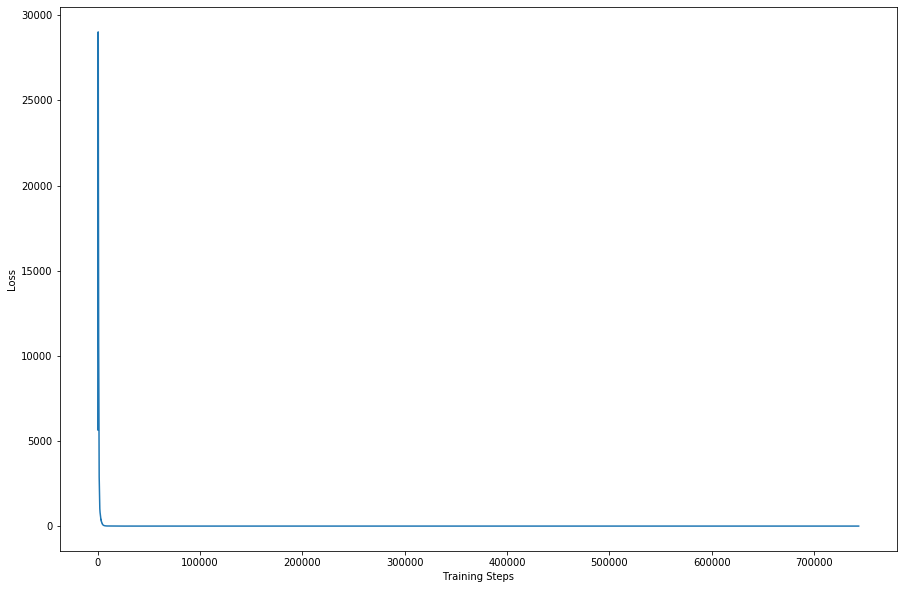

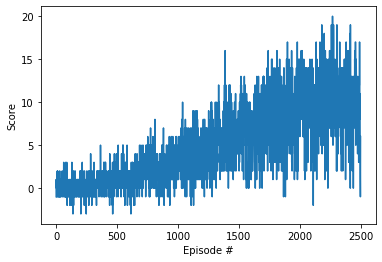

<Figure size 432x288 with 0 Axes>

In [7]:
# evaluate training

plot_losses(losses, 'losses-2500.png')
plot_scores(scores, 'scores-2500.png')

In [8]:
# save model

save_model(model, optimizer, replay, 'checkpoint-2500.pt')

cpu
Avg. score: 7.91, with a high of: 24.0


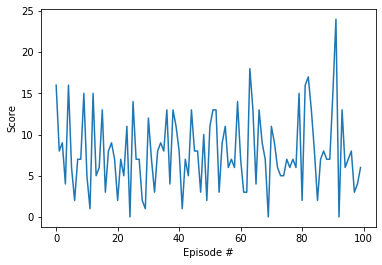

<Figure size 432x288 with 0 Axes>

In [9]:
# test model

test_actor_env = (model, brain_name, env)
attemps = 100
filename = 'test_scores-2500.png'

test_model(test_actor_env, attemps, filename)

In [10]:
env.close()